# MODELO 70/30 (TREINO/TESTE) 

## ETAPA 1: ANÁLISE E PRÉ-PROCESSAMENTO DOS DADOS 

### IMPORTANDO AS BIBLIOTECAS PYTHON

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

### IMPORTANDO OS PARAMETROS DA BIBLIOTECA SCIKIT-LEARN

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### IMPORTANDO OS ALGORITMOS DE CLASSIFICAÇÃO DA BIBLIOTECA SCIKIT-LEARN

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### CARREGANDO O DATASET (data_seedcp.csv) 



#### acrescentado no comando read o separador como ponto-e-vírgula (' ; ')

In [19]:
df = pd.read_csv("C:\\Users\\pc\\Desktop\\FIAPfase4cap3\\data_seedcp.csv", sep = ";")
print(df)

     tipo_de_grao   area  perimetro  compacidade  comprimento_nucleo  \
0               1  15.26      14.84       0.8710               5.763   
1               1  14.88      14.57       0.8811               5.554   
2               1  14.29      14.09       0.9050               5.291   
3               1  13.84      13.94       0.8955               5.324   
4               1  16.14      14.99       0.9034               5.658   
..            ...    ...        ...          ...                 ...   
205             3  12.19      13.20       0.8783               5.137   
206             3  11.23      12.88       0.8511               5.140   
207             3  13.20      13.66       0.8883               5.236   
208             3  11.84      13.21       0.8521               5.175   
209             3  12.30      13.34       0.8684               5.243   

     largura_nucleo  coef_assimetria  comp_sulco_nucleo  
0             3.312            2.221              5.220  
1             3.333

#### exibindo as primeiras 5 linhas do dataset

In [17]:
df.head()

,tipo_de_grao,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coef_assimetria,comp_sulco_nucleo
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,1,14.88,14.57,0.8811,5.554,3.333,3.599,4.956
2,1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,1,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,1,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


#### solicitando exibição de 20 linhas aleatórias do dataset

In [18]:
df.sample(20)

,tipo_de_grao,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coef_assimetria,comp_sulco_nucleo
160,3,12.54,13.67,0.8425,5.451,2.879,3.082,5.491
19,1,12.72,13.57,0.8686,5.226,3.049,4.102,4.914
165,3,12.10,13.15,0.8793,5.105,2.941,2.201,5.056
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
4,1,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
104,2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
184,3,12.89,13.77,0.8541,5.495,3.026,6.185,5.316
48,1,14.79,14.52,0.8819,5.545,3.291,2.704,5.111
161,3,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
85,2,18.27,16.09,0.8870,6.173,3.651,2.443,6.197


### ANÁLISE EXPLORATÓRIA

#### resumo estatísticos com função describe ( )

In [20]:
df.describe ( )

,tipo_de_grao,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coef_assimetria,comp_sulco_nucleo
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2.000000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,0.818448,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,1.000000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,2.000000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,3.000000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,3.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


#### resumo informativo do dataset com o comando df.info ( )

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tipo_de_grao        210 non-null    int64  
 1   area                210 non-null    float64
 2   perimetro           210 non-null    float64
 3   compacidade         210 non-null    float64
 4   comprimento_nucleo  210 non-null    float64
 5   largura_nucleo      210 non-null    float64
 6   coef_assimetria     210 non-null    float64
 7   comp_sulco_nucleo   210 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


#### verificando a presença de dados duplicados

In [22]:
duplicates = df.duplicated().sum() 
print (f"O número de dados duplicados é: ", duplicates)

O número de dados duplicados é:  0


#### verificando a presença de outliers

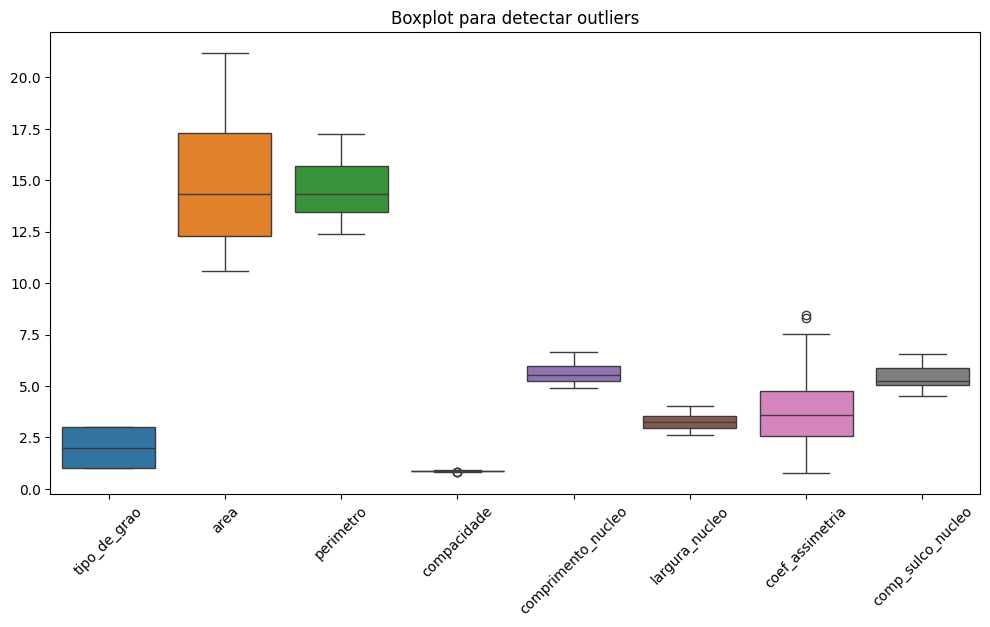

In [23]:
plt.figure (figsize= (12, 6))
sns.boxplot (data=df)
plt.title ("Boxplot para detectar outliers")
plt.xticks (rotation= 45) 
plt.show ()

A distribuição dos dados também apresenta assimetria em algumas variáveis, indicando que os dados podem não estar normalmente distribuídos. Podemos verificar parametros como 'area', 'comp_sulco_nucleo' e comp_nucleo' com uma distribuição assimétrica de dados em torno da mediana. 

#### Explorando as relações entre as variaveis do dataset

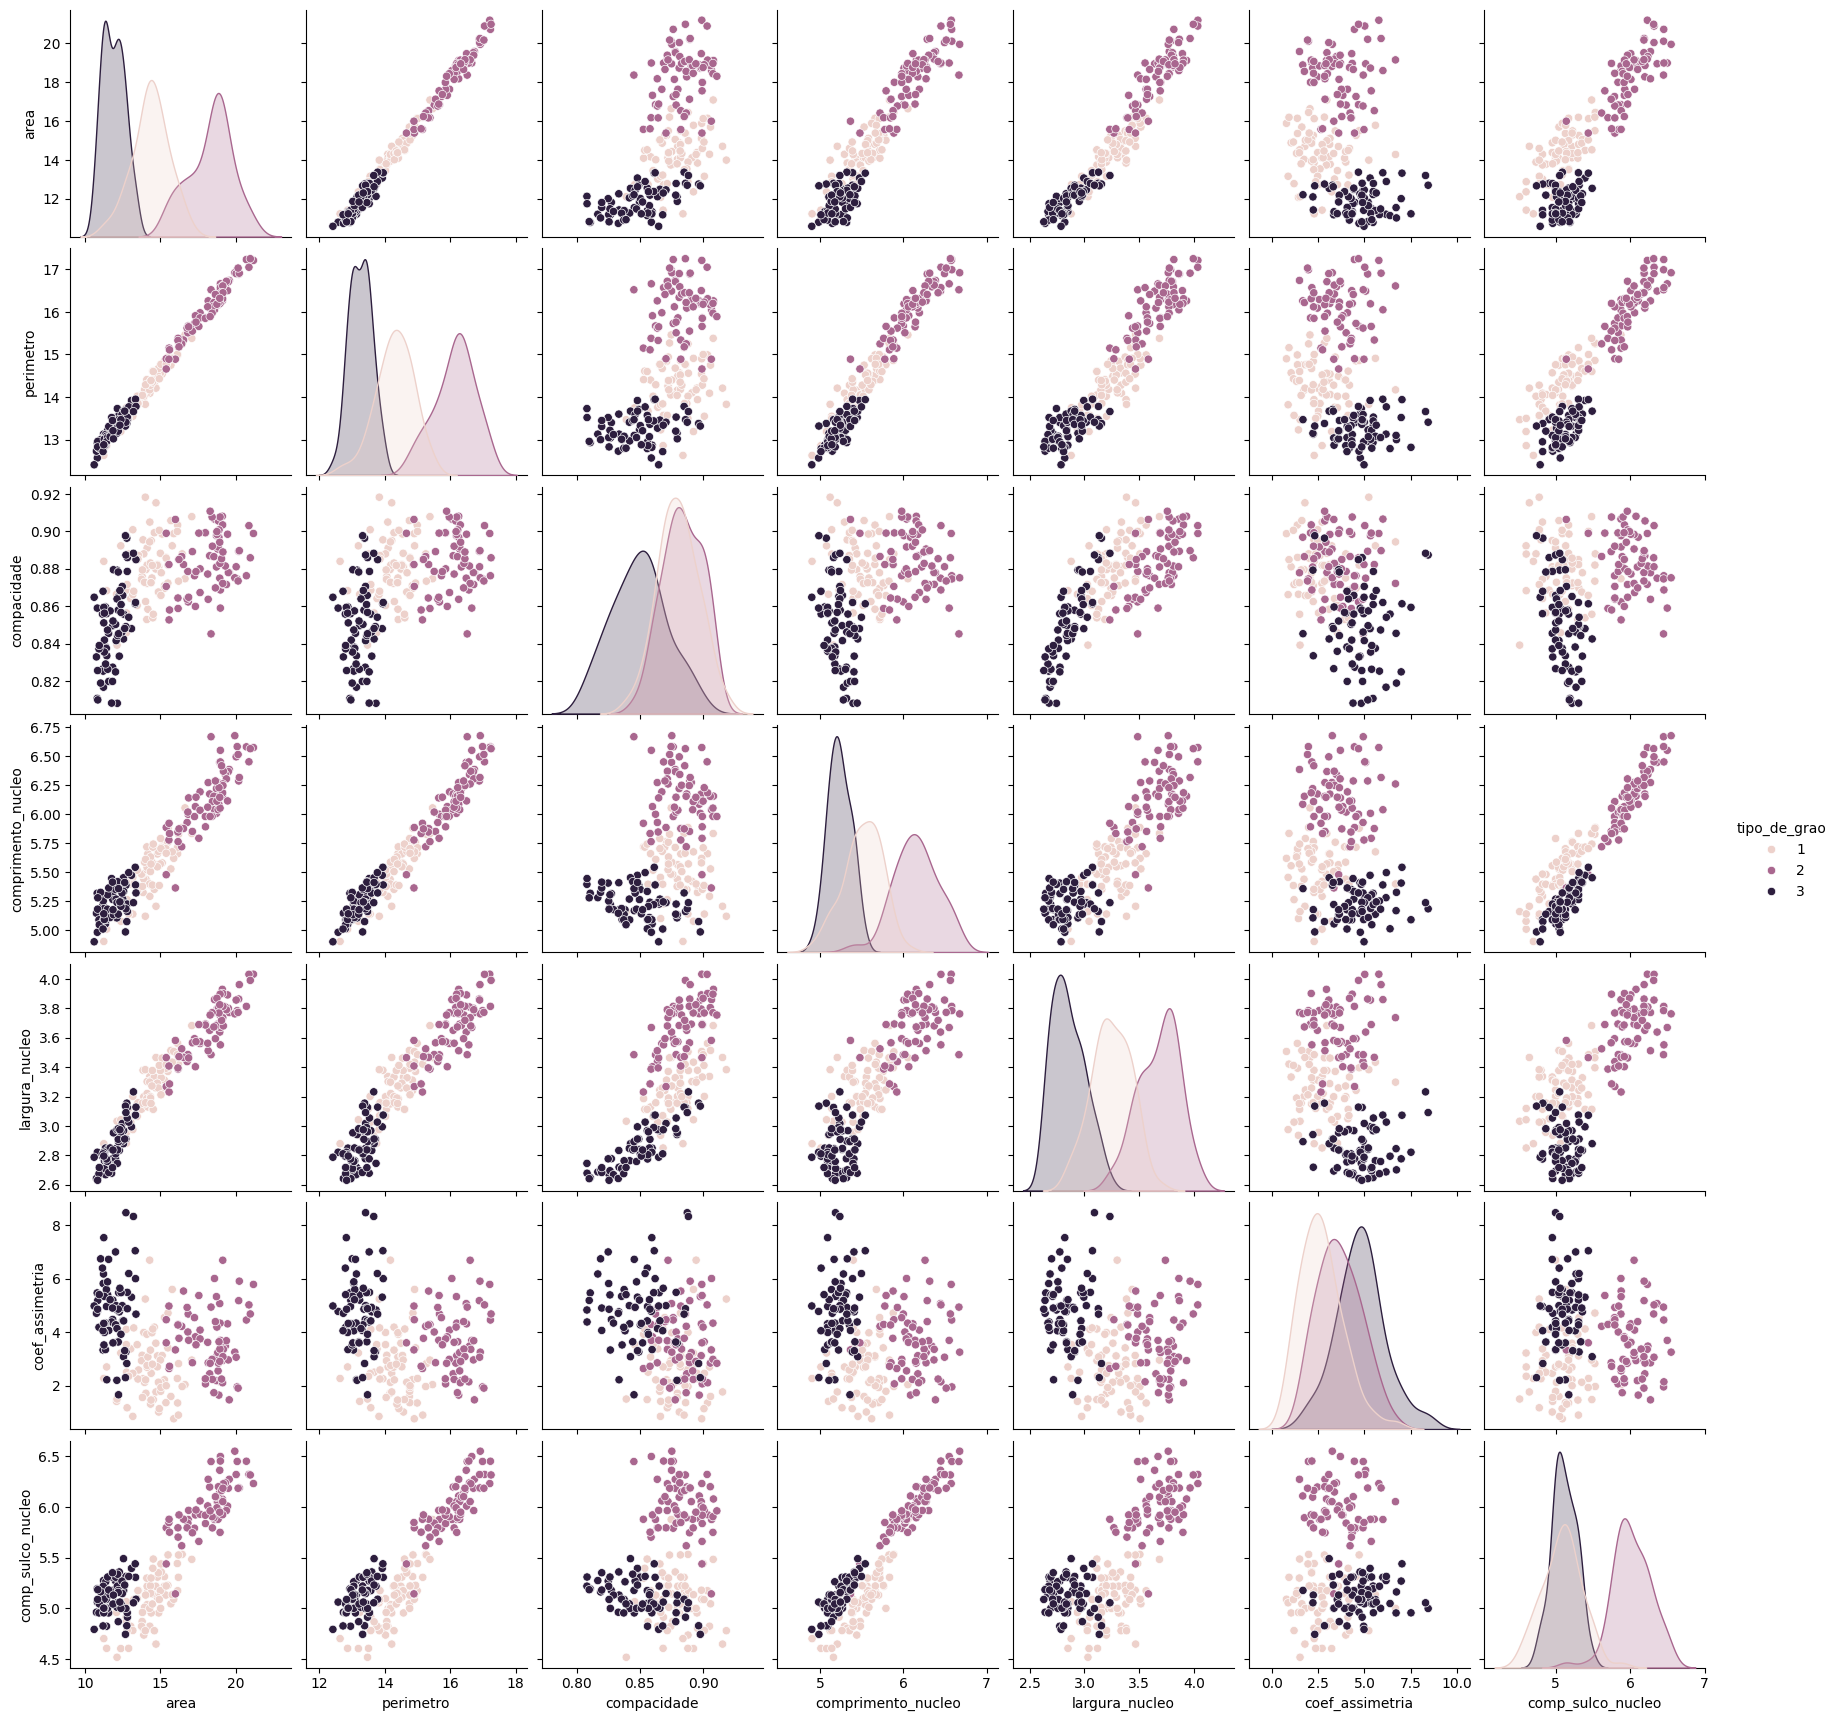

In [13]:
sns.pairplot(df, hue='tipo_de_grao')

obs: as variáveis 'area' e 'perimetro' tendem a formar uma linha ascendente mais homogênea, mostrando  a correlação mais forte. A variável 'compacidade' e 'coef_assimetria', independente do tipo de grão, alem de ter seus pontos espalhados aleatoriamente (sugerindo ausência de correlação) ainda apresentam grande sobreposição dos 3 grupos de tipo de grão, tornando a distinção entre os eles menos precisa.  As variáveis 'largura_nucleo', 'comprimento_nucleo' tendem tambem a formar uma linha ascendente em relação às variáveis 'area' e 'perimetro', sugerindo algum grau de correlação entre si.  

#### exploração da distribuição dos labels

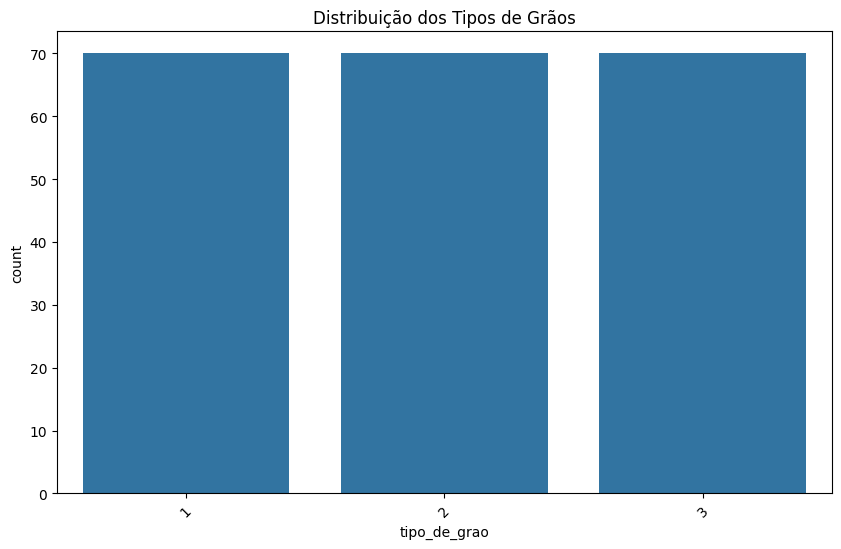

In [24]:
# exploracao da distribuicao dos labels
plt.figure (figsize = (10, 6))
sns.countplot (x='tipo_de_grao', data=df)
plt.title ("Distribuição dos Tipos de Grãos")
plt.xticks (rotation=45)
plt.show ()

dataset aparentemente balanceado e representativo com relação à distribuição de dados, caracteristicas que favorecem a generalização e o aprendizado de máquina.  

### HEATMAP (correlação entre as features numéricas)

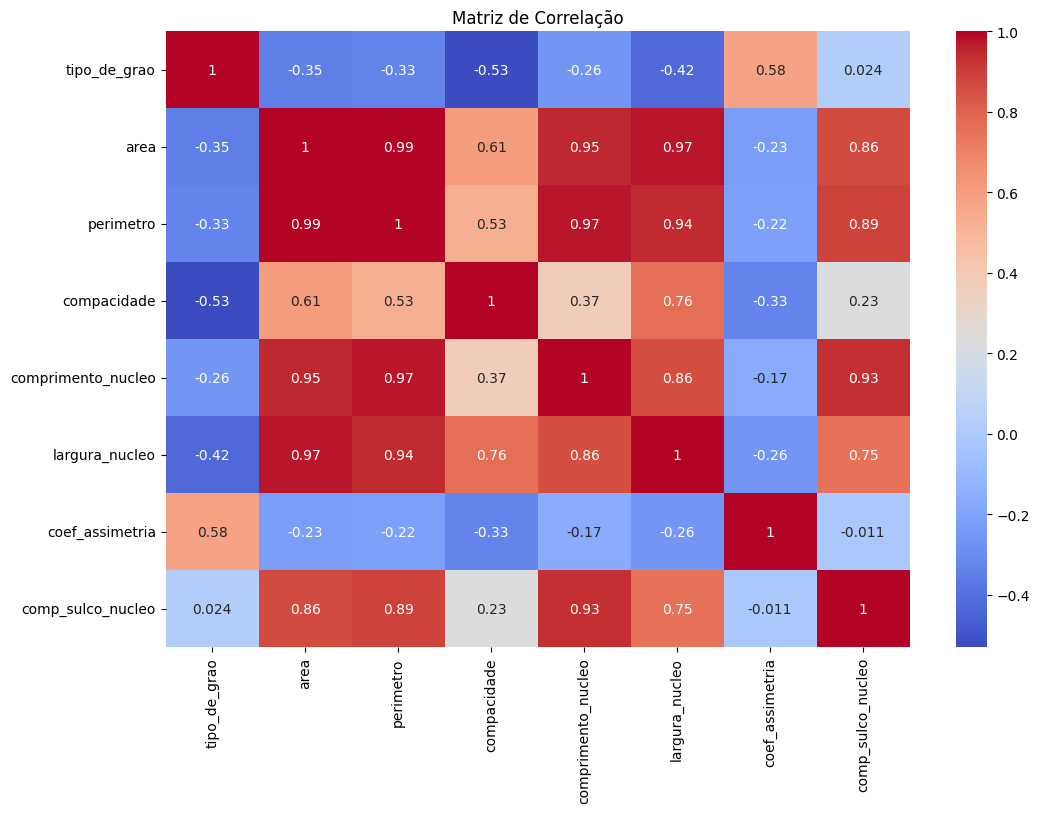

In [25]:
#correlacao entre as features numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure (figsize= (12, 8))
sns.heatmap(df.select_dtypes (include=numerics). corr(), annot=True, cmap='coolwarm')
plt.title ("Matriz de Correlação")
plt.show()


 As variáveis "área", "perímetro", "comprimento_nucleo" e "largura_nucleo" apresentam uma correlação muito alta entre si, indicando forte correlação. Isso pode levar a multicolinearidade e comprometer a estabilidade do modelo.

### PRÉ-PROCESSAMENTO DOS DADOS

#### padronizando os dados

##### substituindo os valores dos outliers pela mediana

In [26]:
median_coef_assimetria = df ['coef_assimetria'].median ()
df['coef_assimetria'] = df ['coef_assimetria'].apply(lambda x: median_coef_assimetria if x > df ['coef_assimetria'].quantile (0.975) or x < df['coef_assimetria'].quantile (0.025) else x)

df.shape

(210, 8)

## ETAPA 2: IMPLEMENTAÇÃO E COMPARAÇÃO DOS ALGORITMOS DE CLASSIFICAÇÃO

### separando labels e features

In [27]:
X = df.drop ('tipo_de_grao', axis=1)
y = df['tipo_de_grao']

### atribuindo o Label Encoder  para a variavel tipo_de_grao (variável alvo)

In [28]:
le = LabelEncoder()
y = le.fit_transform (y)

### dataset após atribuição do Label Enconder

In [29]:
X.sample(10)


,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coef_assimetria,comp_sulco_nucleo
10,15.26,14.85,0.8696,5.714,3.242,4.543,5.314
101,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
120,20.24,16.91,0.8897,6.315,3.962,5.901,6.188
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044
82,20.20,16.89,0.8894,6.285,3.864,5.173,6.187
69,12.73,13.75,0.8458,5.412,2.882,3.533,5.067
92,18.81,16.29,0.8906,6.272,3.693,3.237,6.053
44,15.11,14.54,0.8986,5.579,3.462,3.128,5.180
42,13.16,13.55,0.9009,5.138,3.201,2.461,4.783
151,12.01,13.52,0.8249,5.405,2.776,3.599,5.270


### dividindo os dados em conjuntos de treino e teste (70/30)

In [30]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

### normalização das features numericas para  MinMaxScaler

In [31]:
#normalização das features numericas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform (X_train)
X_test_scaled = scaler.transform (X_test)

## TREINANDO O MODELO 1 

### ALGORITMO 1: Regressão Logistica

In [32]:
logreg = LogisticRegression ()
logreg.fit (X_train_scaled, y_train)
y_pred_logreg = logreg.predict (X_test_scaled)
print (f"A acurácia da Regressão Logistica é: ", accuracy_score (y_test, y_pred_logreg))
print (classification_report (y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

mse = mean_squared_error(y_test, y_pred_logreg)
mae = mean_absolute_error(y_test, y_pred_logreg)
r2 = r2_score(y_test, y_pred_logreg)

print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

A acurácia da Regressão Logistica é:  0.873015873015873
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       1.00      0.95      0.98        21
           2       0.86      0.82      0.84        22

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63

[[17  0  3]
 [ 1 20  0]
 [ 4  0 18]]
MSE = 0.4603174603174603
MAE = 0.23809523809523808
R² = 0.30847842543527604


### ALGORITMO 2: KNN (K-NEAREST NEIGHBORS)

In [33]:
knn = KNeighborsClassifier (n_neighbors = 3)
knn.fit (X_train_scaled, y_train)
y_pred_knn = knn.predict (X_test_scaled)
print (f"A acurácia do KNN é: ", accuracy_score (y_test, y_pred_knn))
print (classification_report (y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

A acurácia do KNN é:  0.8888888888888888
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       1.00      0.95      0.98        21
           2       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]
MSE = 0.3968253968253968
MAE = 0.20634920634920634
R² = 0.40386071158213455


O modelo KNN foi treinado com diferentes valores de parametro (n_neighbors = ) - melhor modelo encontrado foi o acima

### ALGORITMO 3: SVM (SUPPORT VECTOR MACHINE)

#### SVM COM KERNEL RBF

In [34]:
svm_rbf = SVC (kernel = 'rbf')
svm_rbf.fit (X_train_scaled, y_train)
y_pred_svm_rbf = svm_rbf.predict (X_test_scaled)
print (f"A acurácia da SVM (RBF) é: ", accuracy_score (y_test, y_pred_svm_rbf))
print (classification_report (y_test, y_pred_svm_rbf))
print(confusion_matrix(y_test, y_pred_svm_rbf))

mse = mean_squared_error(y_test, y_pred_svm_rbf)
mae = mean_absolute_error(y_test, y_pred_svm_rbf)
r2 = r2_score(y_test, y_pred_svm_rbf)

print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

A acurácia da SVM (RBF) é:  0.8888888888888888
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       1.00      0.95      0.98        21
           2       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]
MSE = 0.3968253968253968
MAE = 0.20634920634920634
R² = 0.40386071158213455


#### SVM COM KERNEL POLINOMIAL

In [35]:
svm_poly = SVC (kernel = 'poly')
svm_poly.fit (X_train_scaled, y_train)
y_pred_svm_poly = svm_poly.predict (X_test_scaled)
print (f"A acurácia da SVM (Polinomial) é: ", accuracy_score (y_test, y_pred_svm_poly))
print (classification_report (y_test, y_pred_svm_poly))
print(confusion_matrix(y_test, y_pred_svm_poly))

mse = mean_squared_error(y_test, y_pred_svm_poly)
mae = mean_absolute_error(y_test, y_pred_svm_poly)
r2 = r2_score(y_test, y_pred_svm_poly)

print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

A acurácia da SVM (Polinomial) é:  0.9047619047619048
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       1.00      0.95      0.98        21
           2       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]
MSE = 0.3333333333333333
MAE = 0.1746031746031746
R² = 0.49924299772899305


#### SVM COM KERNEL LINEAR

In [36]:
svm_linear = SVC (kernel = 'linear')
svm_linear.fit (X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict (X_test_scaled)
print (f"A acurácia da SVM (Linear) é: ", accuracy_score (y_test, y_pred_svm_linear))
print (classification_report (y_test, y_pred_svm_linear))
print(confusion_matrix(y_test, y_pred_svm_linear))
mse = mean_squared_error(y_test, y_pred_svm_linear)
mae = mean_absolute_error(y_test, y_pred_svm_linear)
r2 = r2_score(y_test, y_pred_svm_linear)

print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

A acurácia da SVM (Linear) é:  0.873015873015873
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       1.00      0.95      0.98        21
           2       0.86      0.82      0.84        22

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63

[[17  0  3]
 [ 1 20  0]
 [ 4  0 18]]
MSE = 0.4603174603174603
MAE = 0.23809523809523808
R² = 0.30847842543527604


### ALGORITMO 4: MODELOS BASEADOS EM ARVORES

#### ARVORE DE DECISÃO

In [37]:
dt = DecisionTreeClassifier ()
dt.fit (X_train_scaled, y_train)
y_pred_dt = dt.predict (X_test_scaled)
print (f"A acurácia da Arvore de Decisao é: ", accuracy_score (y_test, y_pred_dt))
print (classification_report (y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

A acurácia da Arvore de Decisao é:  0.873015873015873
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       1.00      0.90      0.95        21
           2       0.90      0.82      0.86        22

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.88        63
weighted avg       0.89      0.87      0.88        63

[[18  0  2]
 [ 2 19  0]
 [ 4  0 18]]
MSE = 0.4126984126984127
MAE = 0.2222222222222222
R² = 0.3800151400454199


#### RANDOM FOREST

In [38]:
rf = RandomForestClassifier (n_estimators= 170)
rf.fit (X_train_scaled, y_train)
y_pred_rf = rf.predict (X_test_scaled)
print (f"A acurácia da Random Forest é: ", accuracy_score (y_test, y_pred_rf))
print (classification_report (y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"MSE = {mse}")
print(f"MAE = {mae}")
print(f"R² = {r2}")

A acurácia da Random Forest é:  0.9047619047619048
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       1.00      0.95      0.98        21
           2       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]
MSE = 0.3333333333333333
MAE = 0.1746031746031746
R² = 0.49924299772899305


O modelo RANDOM FOREST foi treinado com o parametro (n_estimators = ) utilizando valores diferentes e o modelo selecionado no random search foi o acima

obs: ao aplicar a normalizaçao dos dados a variavel tipo_de_grao teve seus valores foram ajustados para 0, 1 e 2 (tipos 1, 2 e 3 dos grãos, respectivamente) 

### COMPARANDO O DESEMPENHO DOS MODELOS


In [39]:
#### PASSO 1: COMPARANDO ACURÁCIAS

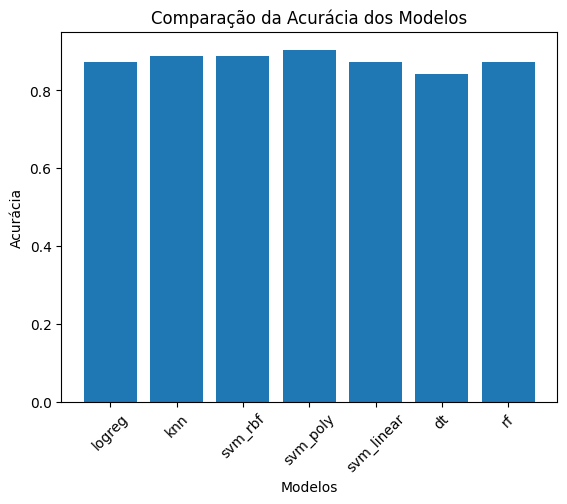

In [40]:
acuracias = [0.8730, 0.8888, 0.8888, 0.9047, 0.8730, 0.8412, 0.8730]
modelos = ['logreg', 'knn', 'svm_rbf', 'svm_poly', 'svm_linear', 'dt', 'rf']

plt.bar(modelos, acuracias)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação da Acurácia dos Modelos')
plt.xticks (rotation=45)
plt.show()

RANDOM SEARCH PARA OTIMIZAR OS MODELOS

In [ ]:
# MODELO RANDOM FOREST

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Definir o modelo base
rf = RandomForestClassifier()

# Definir o espaço de hiperparâmetros
param_dist = {'n_estimators': randint(low=10, high=200),
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': randint(low=2, high=11),
              'min_samples_leaf': randint(low=1, high=11)}

# Criar o objeto RandomizedSearchCV
random_rf = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   cv=5, 
                                   verbose=2, 
                                   random_state=42)

# Ajustar o modelo aos dados
random_rf.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
print("Melhores parâmetros:", random_rf.best_params_)

Treinando novamento o modelo Random Forest com os parametros otimizados

In [42]:
# Ensure to use the best parameters from the RandomizedSearchCV for RandomForestClassifier
best_params_rf = {'n_estimators': 170, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}  # Replace with actual best params from RandomizedSearchCV for RF

modelo_final = RandomForestClassifier(**best_params_rf)
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)
# mostrar acurária
print(f"A acurácia do modelo final é: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred_rf))

A acurácia do modelo final é: 0.873015873015873
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       1.00      0.95      0.98        21
           2       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63



In [43]:
#  MODELOS SVM

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Criando classificador SVM
svm = SVC()

# Definindo hiperparâmetros
param_dist = {'C': uniform(1, 10),
              'gamma': uniform(0.001, 1),
              'kernel': ['rbf', 'poly', 'linear']}

# Gerando o objeto RandomizedSearchCV
random_svm = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=100, cv=5)

# Ajustando o modelo aos dados
random_svm.fit(X_train, y_train)

# exibir melhor conjunto de hiperparâmetros
print("Melhores parâmetros:", random_svm.best_params_)

Melhores parâmetros: {'C': np.float64(8.850033695068849), 'gamma': np.float64(0.8343769768667891), 'kernel': 'linear'}


Testando novamenente o modelo SVM com os parametros otimizados

In [45]:
# Testar o modelo SVM Linear com os melhores hiperparâmetros
best_params_svm_linear = {'C': random_svm.best_params_['C'], 'gamma': random_svm.best_params_['gamma'], 'kernel': 'linear'}
modelo_svm_linear = SVC(**best_params_svm_linear)
modelo_svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = modelo_svm_linear.predict(X_test_scaled)
print(f"A acurácia do modelo SVM Linear é: {accuracy_score(y_test, y_pred_svm_linear)}")
print(classification_report(y_test, y_pred_svm_linear))
print(confusion_matrix(y_test, y_pred_svm_linear))

# Testar o modelo SVM Polinomial com os melhores hiperparâmetros
best_params_svm_poly = {'C': random_svm.best_params_['C'], 'gamma': random_svm.best_params_['gamma'], 'kernel': 'poly'}
modelo_svm_poly = SVC(**best_params_svm_poly)
modelo_svm_poly.fit(X_train_scaled, y_train)
y_pred_svm_poly = modelo_svm_poly.predict(X_test_scaled)
print(f"A acurácia do modelo SVM Polinomial é: {accuracy_score(y_test, y_pred_svm_poly)}")
print(classification_report(y_test, y_pred_svm_poly))
print(confusion_matrix(y_test, y_pred_svm_poly))

# Testar o modelo SVM RBF com os melhores hiperparâmetros
best_params_svm_rbf = {'C': random_svm.best_params_['C'], 'gamma': random_svm.best_params_['gamma'], 'kernel': 'rbf'}
modelo_svm_rbf = SVC(**best_params_svm_rbf)
modelo_svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = modelo_svm_rbf.predict(X_test_scaled)
print(f"A acurácia do modelo SVM RBF é: {accuracy_score(y_test, y_pred_svm_rbf)}")
print(classification_report(y_test, y_pred_svm_rbf))
print(confusion_matrix(y_test, y_pred_svm_rbf))

A acurácia do modelo SVM Linear é: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       1.00      0.95      0.98        21
           2       0.86      0.86      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]
A acurácia do modelo SVM Polinomial é: 0.9047619047619048
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       1.00      0.95      0.98        21
           2       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]
A acurácia do modelo SVM RBF é: 0.9047619047619048
 

In [ ]:
# Modelo Decision Tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Define the model
tree = DecisionTreeClassifier()

# Define the hyperparameter space
param_dist = {
    'max_depth': randint(1, 10),  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 10),  
    'criterion': ['gini', 'entropy']  
}

# Create the RandomizedSearchCV object
random_dt = RandomizedSearchCV(
    estimator=tree, 
    param_distributions=param_dist, 
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    verbose=2, 
    random_state=42
)

# Fit the model to the data
random_dt.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_dt.best_params_)

Treinando novamente o modelo Árvore de Decisão com os parametros otimizados 

In [47]:
# treinar novamente o modelo Decision Tree com os melhores hiperparâmetros
best_params_dt = {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}  # Replace with actual best params from RandomizedSearchCV for DT
modelo_final = DecisionTreeClassifier(**best_params_dt)
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)
# mostrar acurária
print(f"A acurácia do modelo final é: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

A acurácia do modelo final é: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       1.00      0.90      0.95        21
           2       0.90      0.86      0.88        22

    accuracy                           0.89        63
   macro avg       0.90      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63



In [ ]:
# MODELO KNN 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Define the model
knn = KNeighborsClassifier()


param_dist = {
    'n_neighbors': randint(1, 100),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

# Create the RandomizedSearchCV object
random_KNN = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,  
    verbose=2,
    random_state=42
)

# Fit the model to the data
random_KNN.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_KNN.best_params_)

Treinando novamente o modelo KNN com os parametros otimizados

In [49]:
# Treinar novamente o modelo KNN com os melhores hiperparâmetros
best_params_knn = random_KNN.best_params_

modelo_final_knn = KNeighborsClassifier(**best_params_knn)
modelo_final_knn.fit(X_train_scaled, y_train)
y_pred_knn_final = modelo_final_knn.predict(X_test_scaled)

# Mostrar acurácia
print(f"A acurácia do modelo KNN final é: {accuracy_score(y_test, y_pred_knn_final)}")
print(classification_report(y_test, y_pred_knn_final))
print(confusion_matrix(y_test, y_pred_knn_final))

A acurácia do modelo KNN final é: 0.873015873015873
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       1.00      0.95      0.98        21
           2       0.83      0.86      0.84        22

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63

[[16  0  4]
 [ 1 20  0]
 [ 3  0 19]]


In [ ]:
# MODELO REGRESÃO LOGISTICA

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, loguniform


logreg = LogisticRegression()

param_dist = {
    'C': loguniform(1e-3, 10),
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'penalty': ['None', 'l1', 'l2']
}

random_logreg = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=50, cv=5, verbose=2, random_state=42)

random_logreg.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
print("Melhores parâmetros:", random_logreg.best_params_)

Treinando o modelo de regressão logistica com os parametros otimizados

In [ ]:
# Treinar novamente o modelo de regressão logística com os melhores hiperparâmetros
best_params_logreg = random_logreg.best_params

modelo_final_logreg = LogisticRegression(**best_params_logreg)
modelo_final_logreg.fit(X_train_scaled, y_train)
y_pred_logreg_final = modelo_final_logreg.predict(X_test_scaled)

# Mostrar acurácia
print(f"A acurácia do modelo de regressão logística final é: {accuracy_score(y_test, y_pred_logreg_final)}")
print(classification_report(y_test, y_pred_logreg_final))
print(confusion_matrix(y_test, y_pred_logreg_final))

## RESULTADOS




### Para um aprendizado de máquina eficaz, a análise e preparação dos dados é uma etapa primordial. 

O objetivo dessa atividade é desenvolver um modelo de aprendizado de máquina capaz de classificar diferentes variedades de grãos de trigo com base em suas características físicas. 

A análise exploratória dos dados teve com intuito entender a distribuição das características, identificar possíveis correlações e tratar valores ausentes ou duplicador e presenca de outliers e sua repercussão no conjunto de dados. Em seguida, os dados foram tratados e preparados para o modelo, normalizando as features e dividindo o conjunto de dados em treinamento e teste, para que fosse iniciadas a etapa seguinte (implemrentaçao e comparaçao do comprotamento do modelo em relacao aos testes de classificação). 
Os algoritmos de classificação utilizados nesse estudo foram seguintes: KNN, SVM, Random Forest e Regressão Logística. 

Após a seleção do melhor modelo, foi realizadio um retreinamento poara otimização dos hiperparâmetros. 

Os resultados obtidos mostraram que os modelos do tipo arvore de decisão nao se adequaram ao dataset, evoluindo para não convergencia dos dados em diversas vidas.
O modelo que melhor se adaptou ao dataset utilizado foi o SVM polinomial

O modelo acima, após retreinamento utilizando os melhores parâmetros (GridSearch) apreserntou a seguinte performance:

A acurácia do modelo SVM RBF é: 0.9047619047619048

              precision    recall  f1-score   support
           0       0.82      0.90      0.86        20
           1       1.00      0.95      0.98        21
           2       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

A acuracia indica que o modelo classificou corretamente 90.47% das instancia no teste, podendo ser considerado um resultado adequado.

Os parametros de Precisão, Recall e F1_score apresentaram diferenças significativas de valores e isso pode estar relacionado ao fato de que a variável "compacidade" se comporta de maneira errática, sugerindo ausencia de correlacao com o label tipo_de_grao. Tambem o fato de que area e perimetro possuem forte correlacao pode reduzir a acurácia do modelo, prejudicando a análise.

Para resultados mais precisos será preciso realizar novos testes com exclusão de features.